In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st

from rich_dataframe import prettify

Import the dataset into a DatFrame.

In [2]:
miami = pd.read_csv(
    "../datasets/miami-dade-storm-data.csv",
    header=0,
    sep=",",
    low_memory=False,
    parse_dates=["BEGIN_DATE"],
)

print(miami)

     EVENT_ID     CZ_NAME_STR      BEGIN_LOCATION BEGIN_DATE  BEGIN_TIME  \
0      216374  MIAMI-DADE CO.      WESTWOOD LAKES 2010-02-12        1813   
1      216376  MIAMI-DADE CO.              MEDLEY 2010-02-12        1817   
2      216377  MIAMI-DADE CO.         SWEET WATER 2010-02-12        1818   
3      216378  MIAMI-DADE CO.       CORAL WAY VLG 2010-02-12        1820   
4      216387  MIAMI-DADE CO.             HIALEAH 2010-02-12        1821   
..        ...             ...                 ...        ...         ...   
100    886863  MIAMI-DADE CO.         SOUTH MIAMI 2020-05-17        1530   
101    892130  MIAMI-DADE CO.        ALADDIN CITY 2020-05-25          30   
102    912004  MIAMI-DADE CO.        GOLDEN BEACH 2020-08-19        1320   
103    913655  MIAMI-DADE CO.  (HST)HOMESTEAD AFB 2020-08-24         945   
104    913657  MIAMI-DADE CO.       CORAL WAY VLG 2020-08-24        1310   

            EVENT_TYPE MAGNITUDE TOR_F_SCALE  DEATHS_DIRECT  INJURIES_DIRECT  \
0    Th

In [3]:
prettify(miami)

Output()

In [4]:
print(f"The shape of the Miami-Dade County storm wind events dataset is {miami.shape}.")

The shape of the Miami-Dade County storm wind events dataset is (105, 39).


Display the descriptive statistics for the numerical values in the dataset.

In [5]:
miami.describe()

,EVENT_ID,BEGIN_TIME,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,EPISODE_ID,CZ_FIPS,INJURIES_INDIRECT,DEATHS_INDIRECT,BEGIN_RANGE,END_RANGE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,ABSOLUTE_ROWNUMBER
count,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.0,105.0,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,542943.542857,1359.828571,0.009524,0.0,923.809524,57.142857,90596.952381,86.0,0.0,0.0,2.038095,2.085714,1360.514286,25.743631,-80.316604,25.744510,-80.315393,53.000000
std,232768.693305,490.131722,0.097590,0.0,3435.379383,233.228653,38344.064663,0.0,0.0,0.0,2.311858,2.304320,489.787456,0.122349,0.099205,0.122118,0.101585,30.454885
min,216374.000000,20.000000,0.000000,0.0,0.000000,0.000000,37194.000000,86.0,0.0,0.0,0.000000,0.000000,20.000000,25.412000,-80.770000,25.413000,-80.770000,1.000000
25%,385088.000000,1220.000000,0.000000,0.0,0.000000,0.000000,64305.000000,86.0,0.0,0.0,1.000000,1.000000,1224.000000,25.677200,-80.381500,25.677200,-80.380900,27.000000
50%,524178.000000,1351.000000,0.000000,0.0,0.000000,0.000000,86786.000000,86.0,0.0,0.0,1.000000,2.000000,1351.000000,25.760300,-80.331900,25.760100,-80.330000,53.000000
75%,757095.000000,1712.000000,0.000000,0.0,0.000000,0.000000,126304.000000,86.0,0.0,0.0,3.000000,3.000000,1712.000000,25.826300,-80.250000,25.827400,-80.250000,79.000000
max,913657.000000,2301.000000,1.000000,0.0,30000.000000,1000.000000,151635.000000,86.0,0.0,0.0,22.000000,22.000000,2303.000000,25.967000,-80.118000,25.975000,-80.118800,105.000000


In [6]:
# Count totals of each wind event type in the dataset
events = miami["EVENT_TYPE"]
events.value_counts()

Thunderstorm Wind    93
Tornado              12
Name: EVENT_TYPE, dtype: int64

At this point, we can see that there were more Thunderstorm Wind events than Tornadoes over the selected decade (2010-2020).

In [8]:
# For this EDA, I am only interested in the dates and event types
miami_storms = miami[["BEGIN_DATE", "EVENT_TYPE"]]
print(miami_storms)

    BEGIN_DATE         EVENT_TYPE
0   2010-02-12  Thunderstorm Wind
1   2010-02-12  Thunderstorm Wind
2   2010-02-12  Thunderstorm Wind
3   2010-02-12  Thunderstorm Wind
4   2010-02-12  Thunderstorm Wind
..         ...                ...
100 2020-05-17  Thunderstorm Wind
101 2020-05-25            Tornado
102 2020-08-19            Tornado
103 2020-08-24  Thunderstorm Wind
104 2020-08-24  Thunderstorm Wind

[105 rows x 2 columns]


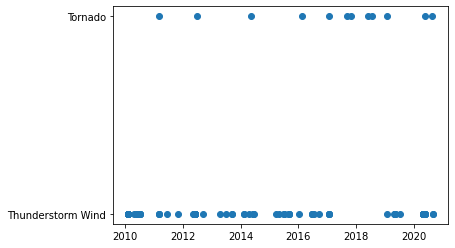

In [9]:
# Plot the dates and events
y = miami_storms["EVENT_TYPE"]
x = miami_storms["BEGIN_DATE"]
plt.plot_date(x, y)

<AxesSubplot:xlabel='BEGIN_DATE'>

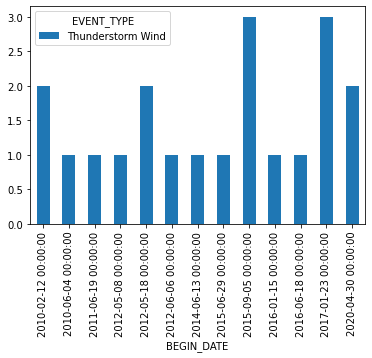

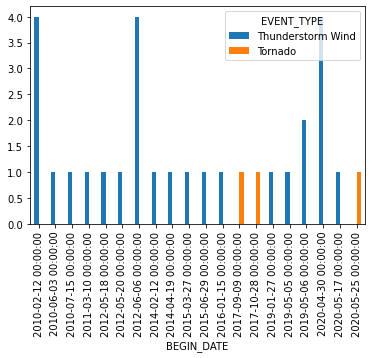

In [10]:
# Create sample sizes
sample_twenty = miami_storms.sample(20)
sample_thirty = miami_storms.sample(30)
# Repeat the samples to make different samples and display in bar graphs
(sample_twenty.groupby(["BEGIN_DATE", "EVENT_TYPE"]).size().unstack().plot.bar())
(sample_thirty.groupby(["BEGIN_DATE", "EVENT_TYPE"]).size().unstack().plot.bar())

In [14]:
# Count annual occurrences of storm wind events in Miami-Dade County
events_annual = miami_storms.groupby(pd.Grouper(key="BEGIN_DATE", axis=0, freq="1Y")).count()
print(events_annual)
events_annual.describe()

            EVENT_TYPE
BEGIN_DATE            
2010-12-31          18
2011-12-31           6
2012-12-31          20
2013-12-31           4
2014-12-31           7
2015-12-31           9
2016-12-31           7
2017-12-31           7
2018-12-31           2
2019-12-31           8
2020-12-31          17


,EVENT_TYPE
count,11.000000
mean,9.545455
std,5.989385
min,2.000000
25%,6.500000
50%,7.000000
75%,13.000000
max,20.000000


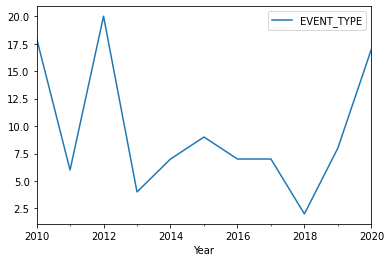

In [15]:
# Plot the annual frequencies for storm wind events
ev_plot = events_annual.plot()
ev_plot.set_xlabel("Year")
ev_plot.set_ylabel = "Wind Events Frequency"

According to the above graph, there was an increase in wind events in 2012 that went down in frequency before spiking again in 2020.

In [16]:
# Now analyze the magnitude of Thunderstorm Winds over the time period
thunderstorm_winds = miami[miami["EVENT_TYPE"]=="Thunderstorm Wind"]
thunderstorm_winds = thunderstorm_winds[["BEGIN_DATE", "EVENT_TYPE", "MAGNITUDE"]]
print(thunderstorm_winds)

    BEGIN_DATE         EVENT_TYPE MAGNITUDE
0   2010-02-12  Thunderstorm Wind     55.00
1   2010-02-12  Thunderstorm Wind     55.00
2   2010-02-12  Thunderstorm Wind     54.00
3   2010-02-12  Thunderstorm Wind     61.00
4   2010-02-12  Thunderstorm Wind     56.00
..         ...                ...       ...
98  2020-05-17  Thunderstorm Wind     36.00
99  2020-05-17  Thunderstorm Wind     36.00
100 2020-05-17  Thunderstorm Wind     36.00
103 2020-08-24  Thunderstorm Wind     56.00
104 2020-08-24  Thunderstorm Wind     52.00

[93 rows x 3 columns]


What is **wind magnitude**? According to the National Weather Service, magnitude refers to wind speed. Winds that are 36mph would be classified as "Near Gale," which means that trees will be swaying in the wind. Wind speeds of 50mph and above tend to cause increased structural damage. Read more at the [National Weather Service "Estimating Wind"](https://www.weather.gov/pqr/wind). 

In [17]:
# Make it pretty - just for fun!
prettify(thunderstorm_winds)

Output()

In [18]:
# Check value types
thunderstorm_winds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 104
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   BEGIN_DATE  93 non-null     datetime64[ns]
 1   EVENT_TYPE  93 non-null     object        
 2   MAGNITUDE   93 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.9+ KB


In [20]:
# Magnitude is an "Object" but needs to be numerical
thunderstorm_winds["MAGNITUDE"] = thunderstorm_winds["MAGNITUDE"].astype(float)
thunderstorm_winds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 104
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   BEGIN_DATE  93 non-null     datetime64[ns]
 1   EVENT_TYPE  93 non-null     object        
 2   MAGNITUDE   93 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.9+ KB


In [21]:
# Now get a few descriptive statistics
thunderstorm_winds.describe()

,MAGNITUDE
count,93.000000
mean,52.301075
std,5.424952
min,36.000000
25%,52.000000
50%,52.000000
75%,55.000000
max,65.000000


The min wind speed between 2010 and 2020 for these thunderstorm wind events is 36mph, while the max speed was 65mph. Mean wind speed was 52.30mph. And the standard deviation is 5.42. 

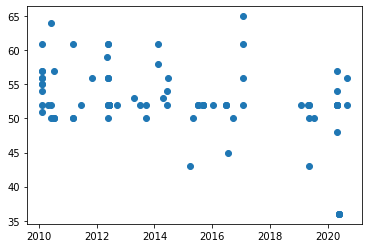

In [23]:
# Create a plot of the magnitudes.
y = thunderstorm_winds["MAGNITUDE"]
x = thunderstorm_winds["BEGIN_DATE"]
plt.plot_date(x, y)

In [31]:
# Return the population variance of Thunderstorm Wind magnitudes
print(st.pvariance(thunderstorm_winds["MAGNITUDE"]))

29.113654757775464


In [35]:
# Return the mode of wind magnitudes
print(st.mode(thunderstorm_winds["MAGNITUDE"]))

52.0
